# Titanic Dataset Grouping and Aggregation

In this notebook you will explore the well known [Titanic dataset](https://www.kaggle.com/c/titanic/data), which contains data about the passengers of the Titanic ship that sunk after hitting an iceberg.

## Import

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

## Load the Titanic data set

Seaborn ships with this dataset, which can be loaded as follows:

In [2]:
titanic = sns.load_dataset('titanic').dropna()

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


## Basic grouping

Compute the mean of the `age` column grouped by `sex`:

In [10]:
# YOUR CODE HERE
titanic.groupby("sex")['age'].apply(np.mean)

sex
female    32.676136
male      38.382128
Name: age, dtype: float64

Create an appropriately labeled Seaborn `violinplot` with `sex` on the x-axis and `age` on the y-axis. This plot displays the same information as the preceeding group-by operation.

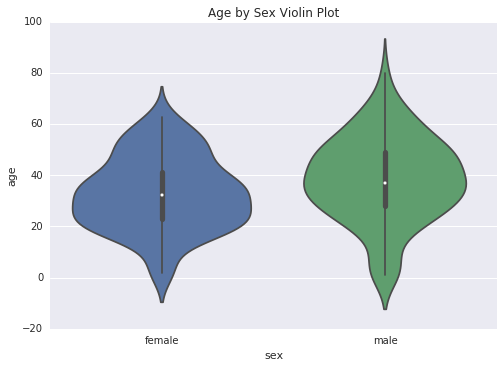

In [12]:
# YOUR CODE HERE
sns.violinplot(x = "sex", y = "age", data = titanic)
plt.title("Age by Sex Violin Plot")

Compute the mean and standard deviation of the `age` column, grouped by the `sex` and `alive` columns. How did age and sex play a role in who survived?

In [17]:
# YOUR CODE HERE
titanic.groupby(['sex', 'alive'])['age'].agg([np.mean, np.std])

mean        std
sex    alive                      
female no     27.500000  23.175418
       yes    33.054878  13.510400
male   no     42.849057  14.309285
       yes    32.607805  17.506299

Create an appropriately labeled Seaborn `boxplot` with `sex` on the x-axis, `age` on the  y-axis and `alive` for the huge. Again, this visualization contains similar information to the preceeding group-by operation.

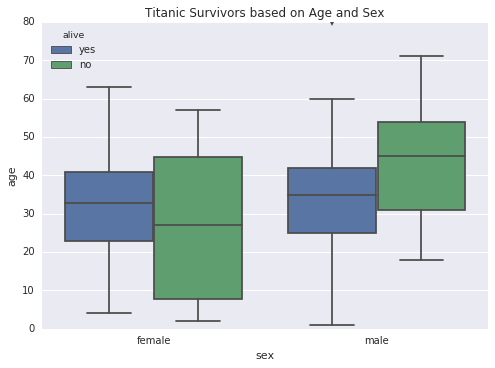

In [20]:
# YOUR CODE HERE
sns.boxplot(x = 'sex', y = 'age', hue = 'alive', data = titanic)
plt.title("Titanic Survivors based on Age and Sex")

## Looking at a categorical variable

Use `value_counts` to count the number of people who where alone, grouped by `sex` and `alive`.

In [22]:
# YOUR CODE HERE
titanic.groupby(['sex', 'alive'])['alone'].value_counts()

sex     alive  alone
female  no     False     4
               True      2
        yes    False    52
               True     30
male    no     True     28
               False    25
        yes    False    23
               True     18
dtype: int64

Create an appropriately labeled `countplot` with `alone` on the x-axis and `alive` as the hue:

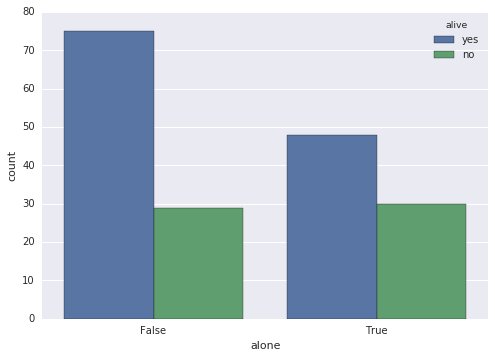

In [24]:
# YOUR CODE HERE
sns.countplot(x = "alone", hue = "alive", data = titanic)

To get a better idea of how being alone made a difference, use the `apply` method to compute for each group in the above query how many more people lived who were not alone than were alone.

In [46]:
# YOUR CODE HERE
titanic.groupby('alive')['alone'].apply(lambda x: x.value_counts())

alive       
no     True     30
       False    29
yes    False    75
       True     48
dtype: int64